# Lab Exercise 1

Tan Bing Shien WQD180104

## 1. Introduction

Data preparation is the most important step in any data mining project. It determines the "make or break" of a data mining project and, it is estimated about 60% of your time will be spent on this stage. There are many processes that can be performed in data preparation, depending on the data type and algorithm of choice for modelling. In this practical, we will focus on the following steps:


1. Understanding data: exploring and visualising data to gain initial insights and understanding.
2. Dealing with missing values: missing values are detrimental to performance of data mining models.
3. Noise and errorneous data cleaning: similar to missing values, they can also negatively impact data mining models and analysis.
4. Data formatting: formatting data into a format suitable for the underlying algorithm and framework to be used.

This includes setting correct roles and data types for variables based on their analytics purpose.


In predictive data mining process, there must be a target variable whose value is to be predicted. In this dataset, we aim to classify whether a person is a lapsing donor or not, corresponding to TargetB.  We are focusing on **classification** prediction mining. We are not interested in knowing the exact amount of donation that  a person will make. In other words, we will not treat this problem as regression prediction problem. Therefore, we will not need `TargetD` and it will be dropped from the dataset.

## 2. Explore dataset

Exploring and validating content of your data is a vital part of the data preparation process. By assaying the prepared data, you substantially reduce the chances of errorneous results in your analysis and gain visual insights into associations between variables. This section will guide you to find these vital insights.

In [67]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
# Import dataset
df = pd.read_csv('lab1.csv')

In [69]:
df.head()

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,14974,NaN,2,4,1,3,17.0,13.50,9.25,...,13,A,0,0,NaN,F,U,0,0,0
1,0,6294,NaN,1,8,0,3,20.0,20.00,15.88,...,24,A,0,23,67.0,F,U,186800,85,0
2,1,46110,4.0,6,41,3,20,6.0,5.17,3.73,...,22,S,1,0,NaN,M,U,87600,36,38750
3,1,185937,10.0,3,12,3,8,10.0,8.67,8.50,...,16,E,1,0,NaN,M,U,139200,27,38942
4,0,29637,NaN,1,1,1,1,20.0,20.00,20.00,...,6,F,0,35,53.0,M,U,168100,37,71509


In [70]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TargetB           9686 non-null   int64  
 1   ID                9686 non-null   int64  
 2   TargetD           4843 non-null   float64
 3   GiftCnt36         9686 non-null   int64  
 4   GiftCntAll        9686 non-null   int64  
 5   GiftCntCard36     9686 non-null   int64  
 6   GiftCntCardAll    9686 non-null   int64  
 7   GiftAvgLast       9686 non-null   float64
 8   GiftAvg36         9686 non-null   float64
 9   GiftAvgAll        9686 non-null   float64
 10  GiftAvgCard36     7906 non-null   float64
 11  GiftTimeLast      9686 non-null   int64  
 12  GiftTimeFirst     9686 non-null   int64  
 13  PromCnt12         9686 non-null   int64  
 14  PromCnt36         9686 non-null   int64  
 15  PromCntAll        9686 non-null   int64  
 16  PromCntCard12     9686 non-null   int64  


This dataset consists of 28 columns.

In [71]:
# Shape of dataset
df.shape

(9686, 28)

This dataset consists of 9686 rows of record and 28 columns.

Firstly, let's take a closer look on the dataset. The dataframe .info() output revealed a number of important information from the dataset:

> - Number of rows (or entries): **9686**
- Number of fields (or columns): **28**
- Number of entries and data type for each column: e.g. **9686** entries and integer number for `Target B`; 
- **7906** entries and floating point for `GiftAvgCard36`.

From point three, we learned there are irregularities in some columns. For example, with **9686** rows in the whole dataset, there are only **7906** data points in `GiftAvgCard36`. 

This requires a deeper investigation of each column.

### 2.1. Explore column data

Assume we would like to investigate the `DemAge` column of this dataset in depth. Recall, a column in Pandas is called a Series, and there are many functions providing insights on the characteristic and distribution of the data.

Function pandas.Series.describe() prints key statistics of a series, including count (number of non-missing values), mean (average), std (standard deviation), min, max, and quantiles (typically at 25%, 50%, 75%. 50% quantile is also called as median).

In [72]:
# Describe numeric features
df.describe()

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome
count,9686.000000,9686.000000,4843.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,...,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,9686.000000,7279.000000,9686.000000,9686.000000,9686.000000
mean,0.500000,97975.474086,15.624344,3.205451,10.507640,1.856597,5.582490,16.017739,14.876203,12.489325,...,48.483481,5.392009,11.954677,19.007124,0.540574,27.150320,59.150845,110986.299814,30.604274,40491.444249
std,0.500026,56550.171120,12.445137,2.133421,8.993401,1.595419,4.736894,12.041805,10.057007,9.209297,...,23.061483,1.323648,4.571568,8.562193,0.498377,14.832665,16.516400,98670.855450,11.394988,28707.494146
min,0.000000,12.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.500000,...,5.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,48835.500000,10.000000,2.000000,4.000000,1.000000,2.000000,10.000000,9.600000,7.750000,...,29.000000,5.000000,7.000000,12.000000,0.000000,14.000000,47.000000,52300.000000,25.000000,24464.000000
50%,0.500000,99106.000000,13.000000,3.000000,8.000000,1.000000,4.000000,15.000000,13.500000,10.710000,...,48.000000,6.000000,13.000000,19.000000,1.000000,27.000000,60.000000,76900.000000,31.000000,43100.000000
75%,1.000000,148538.750000,20.000000,4.000000,15.000000,3.000000,8.000000,20.000000,18.500000,15.000000,...,65.000000,6.000000,16.000000,26.000000,1.000000,40.000000,73.000000,128175.000000,37.000000,56876.000000
max,1.000000,191779.000000,200.000000,16.000000,91.000000,9.000000,41.000000,450.000000,260.000000,450.000000,...,174.000000,17.000000,28.000000,56.000000,1.000000,53.000000,87.000000,600000.000000,85.000000,200001.000000


Function pandas.Series.unique() prints unique values in a Series. Typically used for categorical variables.

In [73]:
# Describe unique value
df['TargetB'].unique()

array([0, 1], dtype=int64)

In [74]:
df['TargetB'].value_counts()

1    4843
0    4843
Name: TargetB, dtype: int64

There are equal size of lapsing donor and non lapsing donor in dataset.

In [75]:
df['DemAge'].unique()

array([nan, 67., 53., 47., 58., 39., 50., 45., 80., 61., 76., 41., 75.,
       59., 51., 31., 54., 70., 42., 65., 81., 38., 56., 69., 52., 33.,
       73., 71., 29., 60., 83., 43., 35., 77., 44., 72., 64., 34., 55.,
       37., 57., 46., 49., 32., 66., 87., 40., 79., 25., 63., 62., 48.,
       68., 86., 23., 27., 74., 78., 85., 26.,  7., 36., 82., 24., 17.,
       30., 84., 21., 28., 22., 19., 16., 14.,  6.,  0.,  2., 20., 18.,
       15.,  4.])

In [76]:
df['DemAge'].value_counts().sort_index()

0.0       1
2.0       1
4.0       1
6.0       3
7.0      32
       ... 
83.0    115
84.0     70
85.0     75
86.0     68
87.0     74
Name: DemAge, Length: 79, dtype: int64

When dealing with interval variables, typically binning (categorising values into certain ranges) is very common to allow easier interpretation. In pandas, we can do this by supplying bins parameter into the .value_counts() function.

In [77]:
df['DemAge'].value_counts(bins = 15)

(69.6, 75.4]     992
(46.4, 52.2]     885
(63.8, 69.6]     872
(75.4, 81.2]     869
(52.2, 58.0]     806
(40.6, 46.4]     690
(58.0, 63.8]     615
(34.8, 40.6]     537
(81.2, 87.0]     508
(29.0, 34.8]     221
(23.2, 29.0]     163
(11.6, 17.4]      53
(5.8, 11.6]       35
(17.4, 23.2]      30
(-0.088, 5.8]      3
Name: DemAge, dtype: int64

The output of these functions revealed a number of data problems with `DemAge` column.

There are only **7279** records in `DemAge` column (from .describe()'s count output), while the total number of records in this data set is **9686**. This indicates missing values in `DemAge`. This observation is also visible through the NaN printed by .unique() method. One record in `DemAge` has 0 as value (from the .value_counts() output). Logically, someone should not have age of 0. 
It indicates an errorneous data that needs to be removed from this column.

These problems need to be rectified before building data mining models. We will learn the techniques to fix data issues later in section 3.

In [78]:
# Explore object(category) columns
cat_cols = [x for x in df.columns if df[x].dtype == 'object']
for col in cat_cols:
    print(df[col].value_counts())
    print("\n")

A    5826
S    2365
F     660
N     574
E     227
L      34
Name: StatusCat96NK, dtype: int64


F    5223
M    3925
U     538
Name: DemGender, dtype: int64


H    5377
U    4309
Name: DemHomeOwner, dtype: int64




The output of these functions revealed a number of data problems:
- Missing values in `TargetD`, `GiftAvgCard36`, `DemAge` columns.
- `DemAge` has 0 as value where it should not happened logically. It indicates an errorneous data. 

### 2.2 Grouping and plotting distributions of columns

Grouping is commonly used to see whether there is a trend between two or more different fields. For example, we would like to 
know specific correlations between tendency to be a lapsing donor (TargetB) and age (DemAge), gender (DemGender) or 
median home value (DemMedHomeValue).

#### Average age of lapsing donors vs non-lapsing donors

In [79]:
df.groupby('TargetB').mean()['DemAge']

TargetB
0    58.304444
1    59.979070
Name: DemAge, dtype: float64

#### Value count of each gender in different donors

In [80]:
df.groupby('TargetB')['DemGender'].value_counts()

TargetB  DemGender
0        F            2614
         M            1963
         U             266
1        F            2609
         M            1962
         U             272
Name: DemGender, dtype: int64

#### Relative frequency of each gender in different donors

In [81]:
gender_counts = df.groupby('TargetB')['DemGender'].value_counts()
print(gender_counts / len(df)) 

TargetB  DemGender
0        F            0.269874
         M            0.202664
         U            0.027462
1        F            0.269358
         M            0.202560
         U            0.028082
Name: DemGender, dtype: float64


It seems there is an equal proportion of female/male/unknown gender donors in both lapsing and non-lapsing donors.

While all of the methods we have used so far are very useful in providing information about the data, data mining professionals 
commonly visualise these information in plots for easier presentation. In Python, there are many libraries to draw great data plots, 
such as matplotlib, seaborn, ggplot, plotly and bokeh. In this unit, we will use seaborn and matplotlib,
two of the most popular visualisation libraries. Import both of them with the following command.

Plotting the distribution values in a field/column is a common visualization task. A number options exist in seaborn/matplotlib. 
For interval/numerical variables, distplot can be used. Let's try that for `DemAge`. **distplot** is sensitive towards missing values 
(which are present in `DemAge`), thus we have to drop them using **dropna()** method.

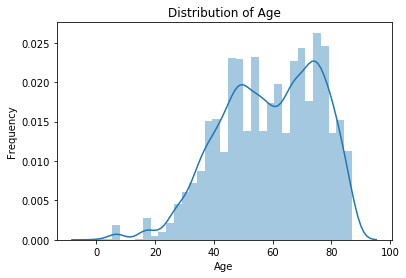

In [82]:
# Plot distribution
sns.distplot(df['DemAge'].dropna())
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency");

From the plot above, we can see most donors are between 40-80 years old, with the data distribution skewed to right.

Distribution plots are typically use only for interval/numerical variables. For nominal/categorical variables, such as `DemGender`, **countplot** is used to build a bar chart to show distribution of each values.

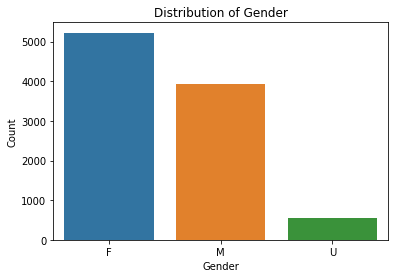

In [83]:
sns.countplot(data = df, x = 'DemGender');
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count");

Lastly, we can explore the distribution of a variable using **boxplot**. Assume we would like to see the difference of home values of the donors vs non-donors. We can build a boxplot with `TargetB` as *X* and `DemMedHomeValue` as *y*.

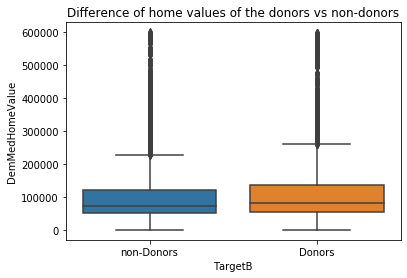

In [84]:
sns.boxplot(data = df,
            x = 'TargetB',
            y = 'DemMedHomeValue')
plt.title("Difference of home values of the donors vs non-donors")
plt.xticks([0, 1], ['non-Donors', 'Donors']);

The boxplot shows a slight difference of home values of lapsing and non-lapsing donors. Lapsing donors have slightly higher average and maximum home value, sign of affluence and wealth.

## 3. Modifying and Correcting Data

Data exploration, grouping and plotting that we performed in the previous section reveal the following problems in the dataset:
- Incorrect type used for `DemCluster` and `DemHomeOwner`. `DemCluster` should be an categorical/nominal variable and `DemHomeOwner` should be a binary variable.
- Errorneous/invalid values (0) in `DemMedIncome` and `DemAge`.
- Missing values in `DemAge`, `DemMedIncome`, `GiftAvgCard36`.
- Redundant variables in `ID` and `TargetD`.

### 3.1. Setting correct type to variables

#### Convert `DemCluster` to category datetype

In [85]:
df['DemCluster'] = df['DemCluster'].astype('category')

#### Convert `DemCluster` to integer datetype with binary variables 

In [86]:
#df.loc[df['DemHomeOwner'] == 'H', 'DemHomeOwner'] = 1
#df.loc[df['DemHomeOwner'] == 'U', 'DemHomeOwner'] = 0
df['DemHomeOwner'] = df['DemHomeOwner'].replace({'H': 1,'U':0})
df['DemCluster'] = df['DemCluster'].astype(int)

### 3.2. Correcting invalid values

#### Replace invalid values (0) in `DemAge` with median.

Use [numpy.nanmedian](https://numpy.org/doc/stable/reference/generated/numpy.nanmedian.html) to calculate median with existance of nan.

In [87]:
df['DemAge'].replace(0, np.nanmedian(df['DemAge']), inplace = True)

#### Replace invalid values (0) in  `DemMedIncome`, `GiftAvgCard36` with mean

In [88]:
cols = ['DemMedIncome', 'GiftAvgCard36']
for c in cols:
    df[c].replace(0, df[c].mean(), inplace = True)

### 3.3. Imputing Missing Values

#### Impute median for missing values in `DemAge`, `DemMedIncome`, `GiftAvgCard36`

In [89]:
df['DemAge'].fillna(np.nanmedian(df['DemAge']), inplace = True)

#### Impute mean for missing values in  `DemMedIncome`, `GiftAvgCard36`

In [90]:
cols = ['DemMedIncome', 'GiftAvgCard36']
for c in cols:
    df[c].fillna(df[c].mean(), inplace = True)

### 3.4. Dropping Unnecessary Variables

#### Drop `ID` and `TargetD` columns

In [91]:
df.drop(columns = ['ID', 'TargetD'], inplace = True)

### 3.5. Wrap Up

In [92]:
df.isna().sum()

TargetB             0
GiftCnt36           0
GiftCntAll          0
GiftCntCard36       0
GiftCntCardAll      0
GiftAvgLast         0
GiftAvg36           0
GiftAvgAll          0
GiftAvgCard36       0
GiftTimeLast        0
GiftTimeFirst       0
PromCnt12           0
PromCnt36           0
PromCntAll          0
PromCntCard12       0
PromCntCard36       0
PromCntCardAll      0
StatusCat96NK       0
StatusCatStarAll    0
DemCluster          0
DemAge              0
DemGender           0
DemHomeOwner        0
DemMedHomeValue     0
DemPctVeterans      0
DemMedIncome        0
dtype: int64

In [93]:
df.to_csv ('lab2.csv', index = False, header=True)